### OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python

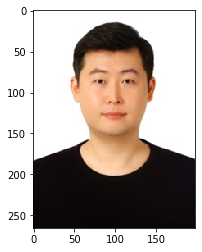

In [2]:
# 이미지 다운로드
# urllib.request 모듈은 웹사이트 데이터 접근
import urllib.request as req
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

# OpenCV로 읽어 들이기
img = cv2.imread('./facedata/me.jpeg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # 이미지 출력
plt.show()


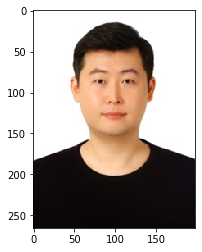

True

In [3]:
# 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

filepath = './facedata/me.jpeg'
img = cv2.imread(filepath)
# plt.axis('off') # axis 출력 끄기
# OpenCV BGR(파녹빨) 인 반면 matplotlib RGB(빨녹파) 순서
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # 이미지 출력
plt.show()

# 이미지 저장하기
cv2.imwrite("./facedata/me.jpg", img)

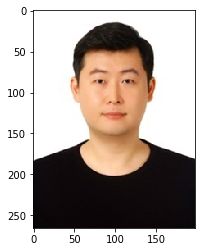

True

In [4]:
import cv2

# 이미지 읽어 들이기
filepath = './facedata/me.jpg'
img = cv2.imread(filepath)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 저장하기
cv2.imwrite("./facedata/out.png", img)

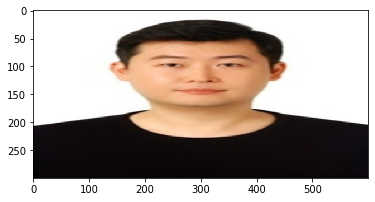

In [5]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
img = cv2.imread("./facedata/me.jpg")
# plt.axis('off')
# 이미지 크기 변경하기
im2 = cv2.resize(img, (600, 300))  # img, (width, height)
# 크기 변경한 이미지 저장하기
cv2.imwrite("./facedata/out-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

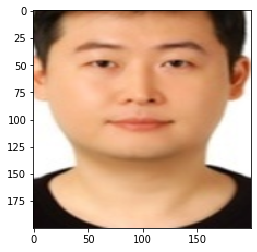

In [24]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
img = cv2.imread("./facedata/me.jpg")
# plt.axis('off')
# 이미지 자르기
im2 = img[50:200, 50:150]  # y1:y2, x1:x2
# 이미지 크기 변경하기
im2 = cv2.resize(im2, (200, 200))
# 크기 변경한 이미지 저장하기
cv2.imwrite("./facedata/cut-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()

#### 얼굴 검출 - 자동으로 얼굴에 모자이크 처리
- 인간의 얼굴이 어디 있는지 검출
- 사람의 얼굴을 검출하고 자동으로 모자이크 처리\
사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리\
얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집

얼굴의 좌표 = 740 130 188 188


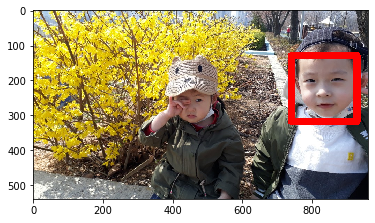

In [26]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기
# OpenCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 잎과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴, 웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = "./facedata/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출

# 이미지를 읽어 들이고 그레이스케일로 변환하기
# 밝은 부분은 흰색, 어두운 부분은 검은색. 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단. 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = './facedata/son.jpeg'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기(cascade.detectMultiScale() 메서드를 사용)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150)) # 그레이스케일 이미지데이터, 얼굴 인식영역의 최소 크기 지정


# 결과 확인하기 
if len(face_list) == 0:          # 검출 결과를 확인 후 리스트가 비어 있으면 메시지 출력 후 종료
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기    # 검출한 얼굴 영역에 붉은색 테두리를 랜더링
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("./facedata/face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



In [3]:
# mosaic.py
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)  # 보간법
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

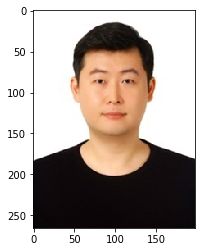

In [27]:
img = cv2.imread("./facedata/me.jpg")
# 이미지 출력하기
cv2.imwrite("./facedata/me.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

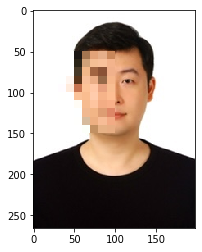

In [34]:
# import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어 들이고 모자이크 처리하기
img = cv2.imread("./facedata/me.jpeg")
mos = mosaic(img, (0, 50, 100, 150), 10) 

# 이미지 출력하기
cv2.imwrite("./facedata/me-mosaic.png", mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()

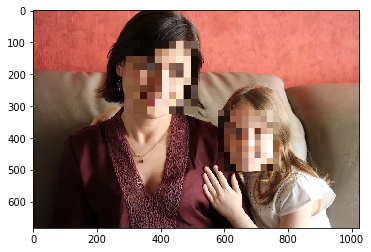

In [36]:
# 사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기 
cascade_file = "./facedata/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이스케일로 변환하기 
img = cv2.imread("./facedata/family.jpg")
# img = cv2.imread("myphoto.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기 
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite("./facedata/family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Q. 5명 이상 얼굴 사진이 들어있는 이미지를 다운로드 받아서 모자이크 처리를 하세요.

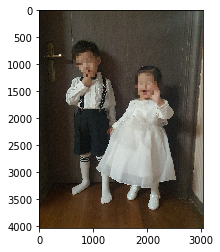

In [35]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

cascade_file = "./facedata/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("./facedata/my.jpeg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = cascade.detectMultiScale(img_gray, minSize=(15,15))
if len(face_list) == 0: quit()

for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

cv2.imwrite("./facedata/my.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Q. 'girl.jpg' 사진을 읽어 와서 다음 사항을 수행하세요.
- 얼굴 검출하고 영역 표시하는 사용자 함수 만들기
- 여러 각도(0 ~ 80 도) 이미지 9개를 for문 과 subplot을 이용하여 만들고 모자이크 처리

---0---
얼굴의 좌표 = 319 308 405 405
---10---
얼굴의 좌표 = 394 385 409 409
---20---
얼굴의 좌표 = 451 444 408 408
---30---
얼굴의 좌표 = 494 483 409 409
---40---
---50---
---60---
---70---
---80---


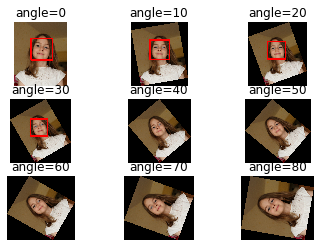

In [38]:
# OpenCV의 얼굴 검출은 옆모습과 기울어진 얼굴을 잘 검출 못함
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "./facedata/haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread("./facedata/girl.jpg")

# 얼굴 검출하고 영역 표시하기
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    # 인식한 부분 표시하기
    for (x,y,w,h) in face_list:
        print("얼굴의 좌표 =", x, y, w, h)
        red = (0, 0, 255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)

# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0, 9):
    ang = i * 10
    print("---" + str(ang) + "---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3, 3, i + 1)
    plt.axis("off")
    plt.title("angle=" + str(ang))
    plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))
        
plt.show()


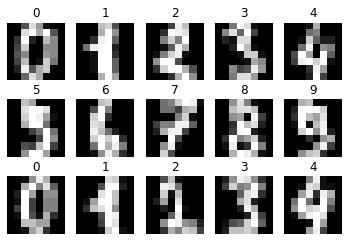

In [17]:
from sklearn import datasets
digits = datasets.load_digits()

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.axis('off')
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i],cmap='gray')
plt.show()

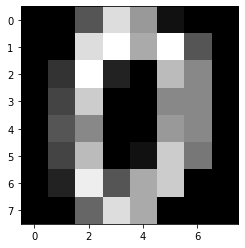

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [19]:
d0 = digits.images[0]
plt.imshow(d0, cmap="gray")
plt.show()

print(d0)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score

# 데이터 읽어 들이기 --- (*1)
digits = datasets.load_digits()
x = digits.images
y = digits.target
x = x.reshape((-1, 64)) # 2차원 배열을 1차원 배열로 변환하기 --- (*2)
# 데이터를 학습 전용과 테스트 전용으로 분리하기 --- (*3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# 데이터 학습하기 --- (*4)
clf = svm.LinearSVC()
clf.fit(x_train, y_train)

# 예측하고 정답률 출력하기 --- (*5)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9622222222222222


In [23]:
# 학습한 데이터 저장하기
from sklearn.externals import joblib
joblib.dump(clf, './digits.pkl')

['./digits.pkl']